In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
stock="POWERGRID.NS"
start= dt.datetime(2000,1,1)
end= dt.datetime.now()


df=yf.download(stock,start,end)

/tmp/ipython-input-1373326884.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.405312,35.272184,26.784310,28.926412,855215656
2007-10-08,30.746387,33.500516,30.553114,33.500516,126671715
2007-10-09,32.840172,33.130079,29.103576,30.762494,116725709
2007-10-10,33.146187,33.822640,32.856279,33.693791,67931378
2007-10-11,36.850574,38.654449,32.856283,38.654449,106320954


In [4]:
df.shape

(4434, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4434 entries, 2007-10-05 to 2025-09-26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4434 non-null   float64
 1   (High, POWERGRID.NS)    4434 non-null   float64
 2   (Low, POWERGRID.NS)     4434 non-null   float64
 3   (Open, POWERGRID.NS)    4434 non-null   float64
 4   (Volume, POWERGRID.NS)  4434 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.8 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4434.000000,4434.000000,4434.000000,4434.000000,4.434000e+03
mean,90.047228,91.195472,88.919507,90.091301,1.192064e+07
std,77.666283,78.551440,76.764242,77.671286,2.013676e+07
min,18.919931,20.224754,16.962698,20.126892,0.000000e+00
25%,36.732533,37.312555,36.259097,36.778015,4.932208e+06
50%,66.842270,67.735118,65.772470,66.743399,8.543705e+06
75%,100.390465,101.969399,98.834326,100.123939,1.378139e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.405312,35.272184,26.784310,28.926412,855215656
1,2007-10-08,30.746387,33.500516,30.553114,33.500516,126671715
2,2007-10-09,32.840172,33.130079,29.103576,30.762494,116725709
3,2007-10-10,33.146187,33.822640,32.856279,33.693791,67931378
4,2007-10-11,36.850574,38.654449,32.856283,38.654449,106320954


In [9]:
df .columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("POWERGRID.csv")

In [11]:
data01=pd.read_csv("POWERGRID.csv")

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                open=data01['Open'],
                high=data01['High'],
                low=data01['Low'],
                close=data01['Close'])])

In [13]:
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df.drop(['Date'], axis=1)
df

/tmp/ipython-input-4159574749.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.405312,35.272184,26.784310,28.926412,855215656
1,2007-10-08,30.746387,33.500516,30.553114,33.500516,126671715
2,2007-10-09,32.840172,33.130079,29.103576,30.762494,116725709
3,2007-10-10,33.146187,33.822640,32.856279,33.693791,67931378
4,2007-10-11,36.850574,38.654449,32.856283,38.654449,106320954
...,...,...,...,...,...,...
4429,2025-09-22,286.649994,289.000000,285.899994,287.000000,9456933
4430,2025-09-23,288.600006,289.000000,285.399994,288.649994,13619147
4431,2025-09-24,293.299988,294.549988,286.950012,287.899994,14032389


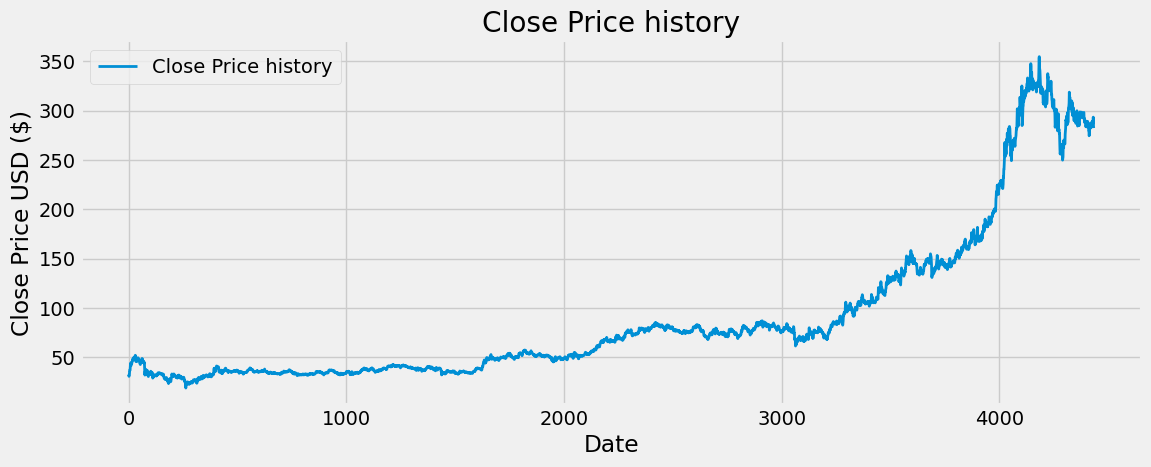

In [16]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close Price history',linewidth=2)
plt.title('Close Price history')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

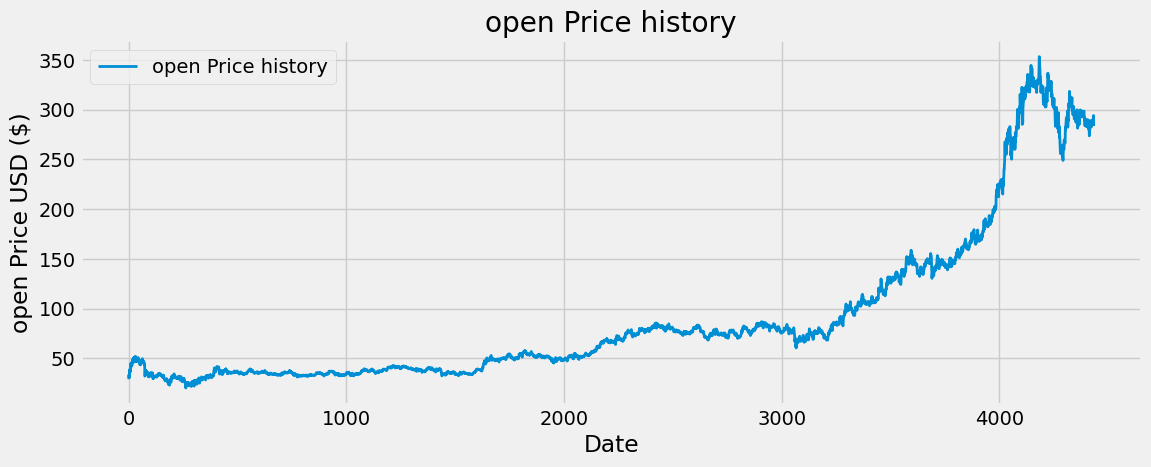

In [17]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Open'], label='open Price history',linewidth=2)
plt.title('open Price history')
plt.xlabel('Date')
plt.ylabel('open Price USD ($)')
plt.legend()
plt.show()

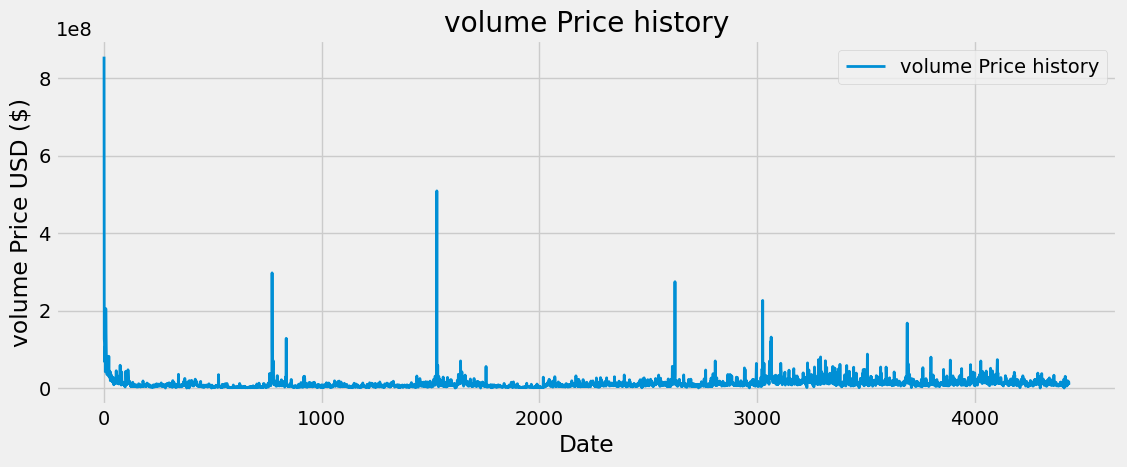

In [18]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Volume'], label='volume Price history',linewidth=2)
plt.title('volume Price history')
plt.xlabel('Date')
plt.ylabel('volume Price USD ($)')
plt.legend()
plt.show()

In [19]:
#moving averge
temp_data=[10,20,30,40,50,60,70,80,90]


In [20]:
import pandas as pd
df01=pd.DataFrame(temp_data)
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [21]:
df01.rolling(window=5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [22]:
m100=df['Close'].rolling(window=100).mean()
m100
m200=df['Close'].rolling(window=200).mean()
m200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4429,290.530952
4430,290.358167
4431,290.206175
4432,290.008698


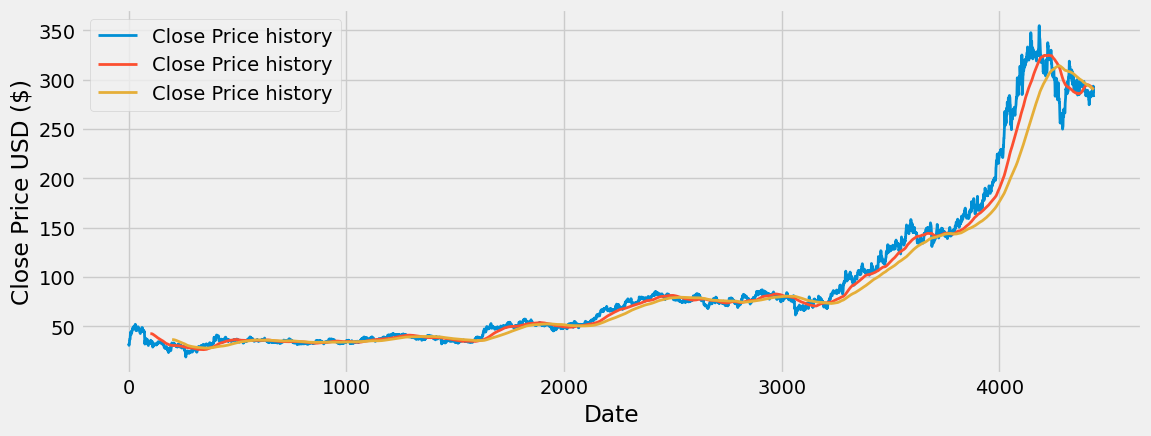

In [23]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close Price history',linewidth=2)
plt.plot(m100, label='Close Price history',linewidth=2)
plt.plot(m200, label='Close Price history',linewidth=2)

plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

In [24]:
#predict
ema100=df.Close.ewm(span=100, adjust=False).mean()
ema200=df['Close'].ewm(span=200, adjust=False).mean()

In [26]:
df.pct_change()

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

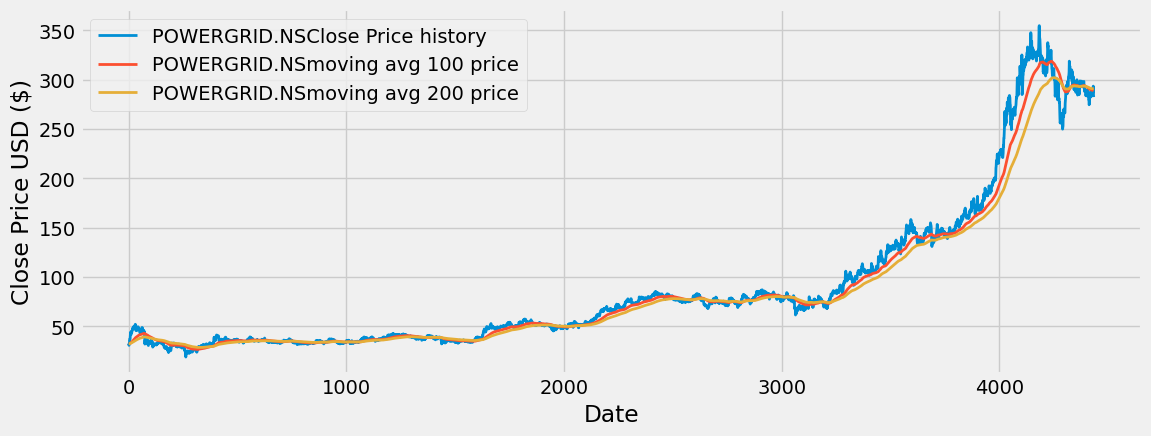

In [27]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label=f'{stock}Close Price history',linewidth=2)
plt.plot(ema100, label=f'{stock}moving avg 100 price',linewidth=2)
plt.plot(ema200, label=f'{stock}moving avg 200 price',linewidth=2)

plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

In [31]:
#training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [32]:
data_training.shape

(3103, 1)

In [33]:
data_testing.shape

(1331, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [36]:
data_training_array=scaler.fit_transform(data_training)

In [37]:
data_training_array.shape

(3103, 1)

In [38]:
data_training_array

array([[0.19808604],
       [0.17371819],
       [0.20447368],
       ...,
       [0.72331621],
       [0.69010907],
       [0.71235138]])

In [43]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
#model building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 275ms/step - loss: 0.1016
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - loss: 0.0103
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step - loss: 0.0088
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step - loss: 0.0076
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - loss: 0.0073
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - loss: 0.0071
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - loss: 0.0071
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 0.0053
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0057
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - loss: 0.0053
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/step - loss: 0.0059
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 278ms/step - loss: 0.0054
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 278ms/step - loss: 0.0056
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step - loss: 0.0044
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 

In [47]:
past_100_days=data_training.tail(100)

In [49]:
combined_data = pd.concat([past_100_days, data_testing], ignore_index=True)

In [50]:
final_df=scaler.fit_transform(combined_data)

In [51]:
input_data=scaler.fit_transform(final_df)

In [54]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [55]:
x_test.shape

(1331, 100, 1)

In [56]:
y_predicted=model.predict(x_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step


In [57]:
y_predicted.shape

(1331, 1)

In [60]:
scaler.scale_

array([1.])

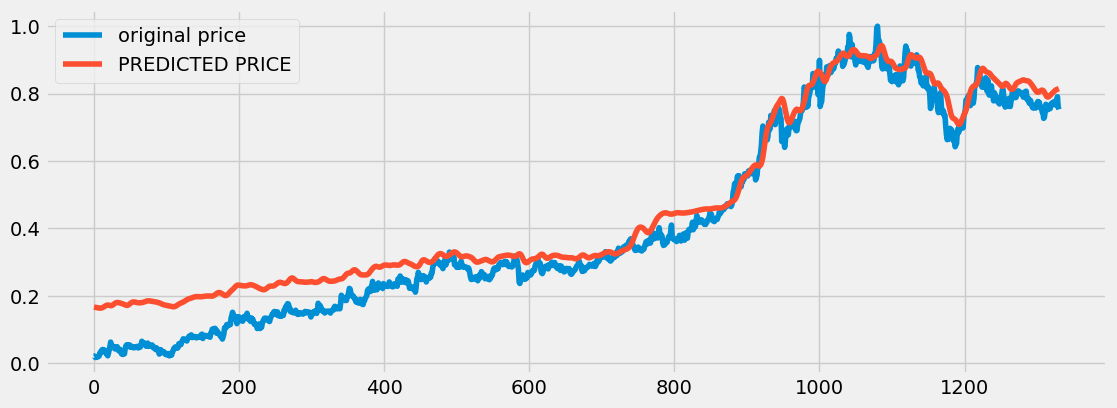

In [62]:
plt.figure(figsize=(12.2,4.5))
plt.plot(y_test, label='original price')
plt.plot(y_predicted, label='PREDICTED PRICE')

plt.legend()
plt.show()

In [63]:
model.save('stock_dl_model.h5')